In [33]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

import seaborn as sns

import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
cr_loan = pd.read_csv('cr_loan2.csv')

In [3]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [42]:
# Null Values
cr_loan.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# EDA

In [6]:
# Cross table of the loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


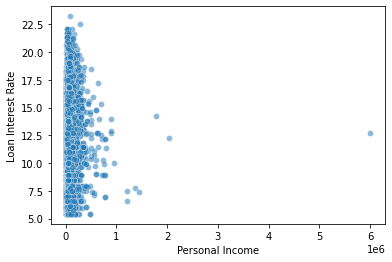

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x ='person_income', y ='loan_int_rate', data =  cr_loan, alpha=0.5)
plt.xlabel("Personal Income")
plt.ylabel("Loan Interest Rate")
plt.show()

In [7]:
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [8]:
# Cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


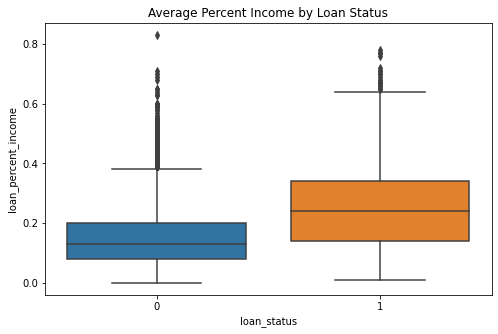

In [14]:
# Box plot of percentage income by loan status
plt.figure(figsize=(8,5))
sns.boxplot(x= 'loan_status', y = 'loan_percent_income', data=cr_loan)
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show();

In [23]:
# Cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [21]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [25]:
# Cross table and include minimum employment length
pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

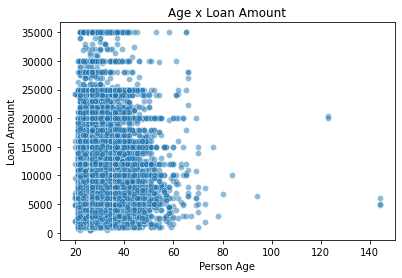

In [29]:
# Scatter plot for age and amount
plt.figure(figsize=(6,4))
sns.scatterplot(x='person_age', y ='loan_amnt',data= cr_loan,  alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.title('Age x Loan Amount')
plt.show()

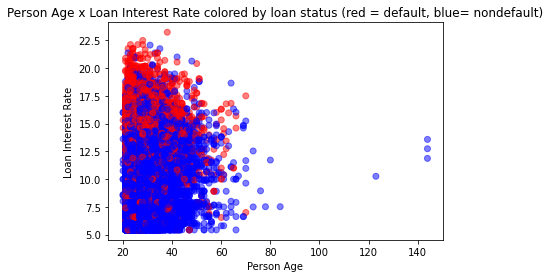

In [76]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan['person_age'], cr_loan['loan_int_rate'],
            c = cr_loan['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.title('Person Age x Loan Interest Rate colored by loan status (red = default, blue= nondefault)')
plt.show();

In [49]:
cr_loa_drop = cr_loan.copy()

# Clean Data , Filter Outliers, Treat Null values

In [62]:
# Remove outliers
# Use Pandas to drop the record from the data frame and create a new one
cr_loa_drop.drop(cr_loan[cr_loan['person_age'] > 100].index, inplace=True)
indices = cr_loa_drop[cr_loa_drop['person_emp_length'] >= 60].index
cr_loa_drop.drop(indices, inplace=True)


In [67]:
#Replacing missing credit data
print(cr_loa_drop.columns[cr_loan.isnull().any()])


# Impute the null values with the median value for all employment lengths
cr_loa_drop['person_emp_length'].fillna((cr_loan_clean['person_emp_length'].median()), inplace=True)



Index(['loan_int_rate'], dtype='object')


In [68]:
# Store the array on indices
indices = cr_loa_drop[cr_loa_drop['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loa_drop.drop(indices)

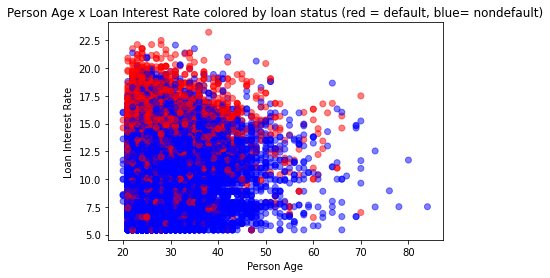

In [77]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_clean['person_age'], cr_loan_clean['loan_int_rate'],
            c = cr_loan_clean['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.title('Person Age x Loan Interest Rate colored by loan status (red = default, blue= nondefault)')
plt.show();

In [71]:
cr_loan_clean.shape

(29459, 12)

In [75]:
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [78]:
cr_loan_clean.to_csv('cr_lean_lean.csv', index=False)